# Importing Libraries

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Data Importation

In [230]:
parents_test = pd.read_csv(
    "/Users/skier/MSDS/Spring1/advML/project/data/adv-ml-2025/gen1_test_comp_final.csv"
)
parents_train = pd.read_csv(
    "/Users/skier/MSDS/Spring1/advML/project/data/adv-ml-2025/gen1_train_comp_final.csv"
)
child_test = pd.read_csv(
    "/Users/skier/MSDS/Spring1/advML/project/data/adv-ml-2025/gen2_test_upto9_comp_final.csv"
)
child_train = pd.read_csv(
    "/Users/skier/MSDS/Spring1/advML/project/data/adv-ml-2025/gen2_train_comp_final.csv"
)

In [231]:
parents_test

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
0,768,F,0.10,53.822825
1,768,F,0.25,61.455579
2,768,F,0.50,69.757527
3,768,F,0.75,73.385477
4,768,F,1.00,78.129137
...,...,...,...,...
2227,368,M,18.00,175.302099
2228,368,M,18.50,NaN
2229,368,M,19.00,174.811082
2230,368,M,19.50,NaN


In [232]:
parents_train

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
0,774,F,0.10,56.961812
1,774,F,0.25,64.826190
2,774,F,0.50,74.340764
3,774,F,0.75,79.747338
4,774,F,1.00,84.092569
...,...,...,...,...
3631,370,F,18.00,174.034011
3632,370,F,18.50,NaN
3633,370,F,19.00,174.233099
3634,370,F,19.50,NaN


In [233]:
child_test

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
0,2831,F,mother,455,0.10,52.912025,NaN
1,2831,F,mother,455,0.25,59.532779,NaN
2,2831,F,mother,455,0.50,67.733527,NaN
3,2831,F,mother,455,0.75,70.450677,NaN
4,2831,F,mother,455,1.00,74.991937,NaN
...,...,...,...,...,...,...,...
1227,2332,M,mother,274,5.00,103.870670,19.938306
1228,2332,M,mother,274,6.00,109.936726,22.661975
1229,2332,M,mother,274,7.00,116.386523,25.626890
1230,2332,M,mother,274,8.00,120.052957,26.943480


In [234]:
child_train

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
0,3012,M,mother,636,0.10,56.251625,4.636903
1,3012,M,mother,636,0.25,64.491579,NaN
2,3012,M,mother,636,0.50,70.465927,NaN
3,3012,M,mother,636,0.75,73.992677,NaN
4,3012,M,mother,636,1.00,79.343537,NaN
...,...,...,...,...,...,...,...
4219,1332,F,father,724,13.00,NaN,NaN
4220,1332,F,father,724,14.00,NaN,NaN
4221,1332,F,father,724,15.00,NaN,NaN
4222,1332,F,father,724,16.00,NaN,NaN


# Data Imputation

## Utility Functions for Imputation

In [235]:
def median_impute_missing_height(
    df: pd.DataFrame,
    age: float,
    parent_id: int,
    col: str = "SHgt_cm",
    sex: str = "M",
) -> pd.DataFrame:
    median_height = df[
        (df["sex_assigned_at_birth"] == sex) & (df["age"] == age)
    ][col].median()
    df.loc[
        (df["gen1_id"] == parent_id) & (df["age"] == age),
        col,
    ] = median_height
    return df


def median_impute_missing_height_child(
    df: pd.DataFrame,
    age: float,
    parent_id: int,
    col: str = "SHgt_cm",
    sex: str = "M",
) -> pd.DataFrame:
    median_height = df[
        (df["sex_assigned_at_birth"] == sex) & (df["AgeGr"] == age)
    ][col].median()
    df.loc[
        (df["gen2_id"] == parent_id) & (df["AgeGr"] == age),
        "SHgt_cm",
    ] = median_height
    return df

## Parents_test Data

In [236]:
parents_test_imputed = parents_test.copy()
parents_test_imputed["SHgt_cm"] = parents_test.groupby("gen1_id")[
    "SHgt_cm"
].transform(lambda x: x.interpolate(method="linear"))

In [237]:
parents_test_imputed[parents_test_imputed["SHgt_cm"].isna()]

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
936,601,F,0.10,NaN
1044,580,M,0.10,NaN
1045,580,M,0.25,NaN
1046,580,M,0.50,NaN


In [238]:
parents_test_imputed = median_impute_missing_height(
    df=parents_test_imputed, age=0.1, sex="F", parent_id=601
)

In [239]:
parents_test_imputed[parents_test_imputed["SHgt_cm"].isna()]

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
1044,580,M,0.10,NaN
1045,580,M,0.25,NaN
1046,580,M,0.50,NaN


In [240]:
for i in [0.10, 0.25, 0.5]:
    parents_test_imputed = median_impute_missing_height(
        df=parents_test_imputed, age=i, sex="M", parent_id=580
    )

In [241]:
parents_test_imputed.isna().sum()

gen1_id                  0
sex_assigned_at_birth    0
age                      0
SHgt_cm                  0
dtype: int64

## Parents Train Data

In [242]:
parents_train.isna().sum()

gen1_id                    0
sex_assigned_at_birth      0
age                        0
SHgt_cm                  310
dtype: int64

In [243]:
parents_train_imputed = parents_train.copy()
parents_train_imputed["SHgt_cm"] = parents_train.groupby("gen1_id")[
    "SHgt_cm"
].transform(lambda x: x.interpolate(method="linear"))

In [244]:
parents_train_imputed.isna().sum()

gen1_id                  0
sex_assigned_at_birth    0
age                      0
SHgt_cm                  5
dtype: int64

In [245]:
parents_train_imputed[parents_train_imputed["SHgt_cm"].isna()]

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
684,705,M,0.10,NaN
1620,580,M,0.10,NaN
1621,580,M,0.25,NaN
1622,580,M,0.50,NaN
2736,489,F,0.10,NaN


In [246]:
parents_train_imputed = median_impute_missing_height(
    df=parents_train_imputed, age=0.1, sex="M", parent_id=705
)
for i in [0.10, 0.25, 0.5]:
    parents_train_imputed = median_impute_missing_height(
        df=parents_train_imputed, age=i, sex="M", parent_id=580
    )
parents_train_imputed = median_impute_missing_height(
    df=parents_train_imputed, age=0.1, sex="F", parent_id=489
)

In [247]:
parents_train_imputed.isna().sum()

gen1_id                  0
sex_assigned_at_birth    0
age                      0
SHgt_cm                  0
dtype: int64

## Children Test Data

In [248]:
child_test.isna().sum()

gen2_id                    0
sex_assigned_at_birth      0
study_parent_sex           0
study_parent_id_new        0
AgeGr                      0
SHgt_cm                  132
Wgt_kg                   823
dtype: int64

In [249]:
child_test_imputed = child_test.copy()
child_test_imputed["SHgt_cm"] = child_test.groupby("gen2_id")[
    "SHgt_cm"
].transform(lambda x: x.interpolate(method="linear"))

In [250]:
child_test_imputed[child_test_imputed["SHgt_cm"].isna()]

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
126,2808,M,mother,644,0.10,NaN,NaN
196,2785,M,mother,414,0.10,NaN,NaN
197,2785,M,mother,414,0.25,NaN,NaN
198,2785,M,mother,414,0.50,NaN,NaN
199,2785,M,mother,414,0.75,NaN,NaN
200,2785,M,mother,414,1.00,NaN,NaN
294,2764,F,mother,612,0.10,NaN,NaN
392,2748,M,father,404,0.10,NaN,NaN
420,2741,F,father,617,0.10,NaN,NaN
476,2725,F,mother,549,0.10,NaN,NaN


In [251]:
for i in child_test_imputed[child_test_imputed["SHgt_cm"].isna()].index:
    child_test_imputed = median_impute_missing_height_child(
        df=child_test_imputed,
        age=child_test_imputed.loc[i, "AgeGr"],
        sex=child_test_imputed.loc[i, "sex_assigned_at_birth"],
        parent_id=child_test_imputed.loc[i, "gen2_id"],
    )

In [252]:
child_test_imputed[child_test_imputed["SHgt_cm"].isna()]

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg


In [253]:
child_test_imputed[child_test_imputed["Wgt_kg"].isna()]

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
0,2831,F,mother,455,0.10,52.912025,NaN
1,2831,F,mother,455,0.25,59.532779,NaN
2,2831,F,mother,455,0.50,67.733527,NaN
3,2831,F,mother,455,0.75,70.450677,NaN
4,2831,F,mother,455,1.00,74.991937,NaN
...,...,...,...,...,...,...,...
1222,2332,M,mother,274,1.00,74.239243,NaN
1223,2332,M,mother,274,1.50,79.359604,NaN
1224,2332,M,mother,274,2.00,82.108449,NaN
1225,2332,M,mother,274,3.00,91.019129,NaN


In [254]:
child_test_imputed["Wgt_kg"] = child_test.groupby("gen2_id")[
    "Wgt_kg"
].transform(lambda x: x.interpolate(method="linear"))

### Need to figure out how to impute missing weight

In [255]:
child_test_imputed[child_test_imputed["Wgt_kg"].isna()]

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
0,2831,F,mother,455,0.10,52.912025,NaN
1,2831,F,mother,455,0.25,59.532779,NaN
2,2831,F,mother,455,0.50,67.733527,NaN
3,2831,F,mother,455,0.75,70.450677,NaN
4,2831,F,mother,455,1.00,74.991937,NaN
...,...,...,...,...,...,...,...
1222,2332,M,mother,274,1.00,74.239243,NaN
1223,2332,M,mother,274,1.50,79.359604,NaN
1224,2332,M,mother,274,2.00,82.108449,NaN
1225,2332,M,mother,274,3.00,91.019129,NaN


## Children Train Data

In [256]:
child_train_imputed = child_train.copy()
child_train_imputed["SHgt_cm"] = child_train.groupby("gen2_id")[
    "SHgt_cm"
].transform(lambda x: x.interpolate(method="linear"))

In [257]:
child_train_imputed[child_train_imputed["SHgt_cm"].isna()]

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
110,2819,F,mother,478,0.10,NaN,NaN
111,2819,F,mother,478,0.25,NaN,NaN
198,2814,F,mother,732,0.10,NaN,NaN
286,2805,M,mother,370,0.10,NaN,NaN
308,2804,F,mother,604,0.10,NaN,NaN
...,...,...,...,...,...,...,...
3740,2530,M,father,602,0.10,NaN,NaN
3762,2529,M,father,396,0.10,NaN,NaN
3850,2524,F,father,574,0.10,NaN,NaN
4180,2330,F,mother,262,0.10,NaN,NaN


In [258]:
for i in child_train_imputed[child_train_imputed["SHgt_cm"].isna()].index:
    child_train_imputed = median_impute_missing_height_child(
        df=child_train_imputed,
        age=child_train_imputed.loc[i, "AgeGr"],
        sex=child_train_imputed.loc[i, "sex_assigned_at_birth"],
        parent_id=child_train_imputed.loc[i, "gen2_id"],
    )

In [259]:
child_train_imputed[child_train_imputed["SHgt_cm"].isna()]

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg


# Trying basic Random Forest

In [260]:
parents_full_imputed = pd.concat(
    [parents_test_imputed, parents_train_imputed], axis=0
)
parents_full_imputed

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
0,768,F,0.10,53.822825
1,768,F,0.25,61.455579
2,768,F,0.50,69.757527
3,768,F,0.75,73.385477
4,768,F,1.00,78.129137
...,...,...,...,...
3631,370,F,18.00,174.034011
3632,370,F,18.50,174.133555
3633,370,F,19.00,174.233099
3634,370,F,19.50,174.326004


In [261]:
children_w_parent = child_train_imputed.merge(
    parents_full_imputed,
    left_on=["study_parent_id_new", "AgeGr"],
    right_on=["gen1_id", "age"],
    how="left",
).drop(["gen1_id", "sex_assigned_at_birth_y"], axis=1)

children_w_parent[children_w_parent["SHgt_cm_y"].isna()]

,gen2_id,sex_assigned_at_birth_x,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm_x,Wgt_kg,age,SHgt_cm_y
88,2827,M,mother,744,0.10,54.059864,NaN,NaN,NaN
89,2827,M,mother,744,0.25,62.715721,NaN,NaN,NaN
90,2827,M,mother,744,0.50,69.375560,NaN,NaN,NaN
91,2827,M,mother,744,0.75,73.427055,NaN,NaN,NaN
92,2827,M,mother,744,1.00,76.093888,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5341,1332,F,father,724,13.00,160.222405,NaN,NaN,NaN
5342,1332,F,father,724,14.00,160.222405,NaN,NaN,NaN
5343,1332,F,father,724,15.00,160.222405,NaN,NaN,NaN
5344,1332,F,father,724,16.00,160.222405,NaN,NaN,NaN


In [262]:
def median_impute_missing_height(
    df: pd.DataFrame,
    age: float,
    parent_id: int,
    col: str = "SHgt_cm",
    sex: str = "M",
    sex_col="sex_assigned_at_birth",
    id_col="gen1_id",
    age_col="age",
) -> pd.DataFrame:
    median_height = df[(df[sex_col] == sex) & (df[age_col] == age)][
        col
    ].median()
    df.loc[
        (df[id_col] == parent_id) & (df[age_col] == age),
        col,
    ] = median_height
    return df

In [263]:
for i in children_w_parent[children_w_parent["SHgt_cm_y"].isna()].index:
    if np.isnan(children_w_parent.loc[i, "SHgt_cm_y"]):
        median_impute_missing_height(
            df=children_w_parent,
            age=children_w_parent.loc[i, "AgeGr"],
            col="SHgt_cm_y",
            parent_id=children_w_parent.loc[i, "study_parent_id_new"],
            sex=children_w_parent.loc[i, "study_parent_sex"],
            sex_col="study_parent_sex",
            id_col="study_parent_id_new",
            age_col="AgeGr",
        )

In [264]:
children_w_parent[children_w_parent["SHgt_cm_y"].isna()].index

Index([], dtype='int64')

In [265]:
children_w_parent

,gen2_id,sex_assigned_at_birth_x,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm_x,Wgt_kg,age,SHgt_cm_y
0,3012,M,mother,636,0.10,56.251625,4.636903,0.10,53.059688
1,3012,M,mother,636,0.10,56.251625,4.636903,0.10,53.818812
2,3012,M,mother,636,0.25,64.491579,NaN,0.25,60.813498
3,3012,M,mother,636,0.25,64.491579,NaN,0.25,61.276841
4,3012,M,mother,636,0.50,70.465927,NaN,0.50,69.100127
...,...,...,...,...,...,...,...,...,...
5341,1332,F,father,724,13.00,160.222405,NaN,NaN,160.298837
5342,1332,F,father,724,14.00,160.222405,NaN,NaN,167.637914
5343,1332,F,father,724,15.00,160.222405,NaN,NaN,173.674507
5344,1332,F,father,724,16.00,160.222405,NaN,NaN,177.547794


In [266]:
X = children_w_parent.drop(
    ["SHgt_cm_x", "Wgt_kg", "age"],
    axis=1,
)
y = children_w_parent[["SHgt_cm_x"]].values

In [267]:
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=["object"]).apply(
    label_encoder.fit_transform
)
x_cat = pd.DataFrame(x_categorical).reset_index(drop=True)
x_numerical = X.select_dtypes(exclude=["object"]).values
x_num = pd.DataFrame(x_numerical)
x = pd.concat([x_num, x_cat], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor_testing = RandomForestRegressor(
    n_estimators=10, random_state=0, oob_score=True
)

# Fit the regressor with x and y data
regressor_testing.fit(x, y)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [268]:
oob_score = regressor_testing.oob_score_
print(f"Out-of-Bag Score: {oob_score}")

# Making predictions on the same data or new data
predictions = regressor_testing.predict(x)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y, predictions)
print(f"R-squared: {r2}")

Out-of-Bag Score: 0.8449424871045835
Mean Squared Error: 10.172477080824386
R-squared: 0.9929327295128028


In [269]:
child_pred_y = regressor_testing.predict(x)

In [270]:
child_preds_train = pd.DataFrame(x)
child_preds_train["preds"] = child_pred_y
child_preds_train = child_preds_train.rename(
    columns={
        0: "child_id",
        1: "parent_id",
        2: "child_age",
        4: "child_sex",
        3: "parent_height",
        5: "parent_sex",
    }
)
child_preds_train

,child_id,parent_id,child_age,parent_height,child_sex,parent_sex,preds
0,3012.0,636.0,0.10,53.059688,1.0,1.0,55.516455
1,3012.0,636.0,0.10,53.818812,1.0,1.0,55.898238
2,3012.0,636.0,0.25,60.813498,1.0,1.0,64.396858
3,3012.0,636.0,0.25,61.276841,1.0,1.0,64.396858
4,3012.0,636.0,0.50,69.100127,1.0,1.0,70.224077
...,...,...,...,...,...,...,...
5341,1332.0,724.0,13.00,160.298837,0.0,0.0,155.849077
5342,1332.0,724.0,14.00,167.637914,0.0,0.0,160.612225
5343,1332.0,724.0,15.00,173.674507,0.0,0.0,160.222405
5344,1332.0,724.0,16.00,177.547794,0.0,0.0,160.222405


In [271]:
child_preds_train["child_height"] = y

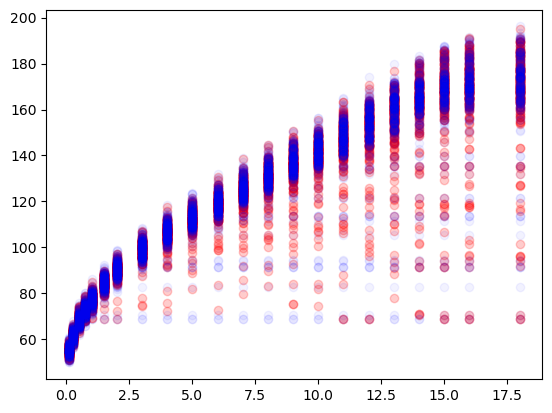

In [272]:
plt.scatter(
    x="child_age", y="preds", data=child_preds_train, color="r", alpha=0.2
)
plt.scatter(
    x="child_age",
    y="child_height",
    data=child_preds_train,
    color="b",
    alpha=0.05,
)

# Using upt9 file

In [273]:
ages = child_train_imputed["AgeGr"].unique()
ages

array([ 0.1 ,  0.25,  0.5 ,  0.75,  1.  ,  1.5 ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 15.  , 16.  , 18.  ])

In [274]:
child_test_imputed

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
0,2831,F,mother,455,0.10,52.912025,NaN
1,2831,F,mother,455,0.25,59.532779,NaN
2,2831,F,mother,455,0.50,67.733527,NaN
3,2831,F,mother,455,0.75,70.450677,NaN
4,2831,F,mother,455,1.00,74.991937,NaN
...,...,...,...,...,...,...,...
1227,2332,M,mother,274,5.00,103.870670,19.938306
1228,2332,M,mother,274,6.00,109.936726,22.661975
1229,2332,M,mother,274,7.00,116.386523,25.626890
1230,2332,M,mother,274,8.00,120.052957,26.943480


In [275]:
children = {}
for i in child_test_imputed["gen2_id"].unique():
    if i not in children:
        children[i] = child_test_imputed[child_test_imputed["gen2_id"] == i]

In [276]:
children[2831]

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
0,2831,F,mother,455,0.10,52.912025,NaN
1,2831,F,mother,455,0.25,59.532779,NaN
2,2831,F,mother,455,0.50,67.733527,NaN
3,2831,F,mother,455,0.75,70.450677,NaN
4,2831,F,mother,455,1.00,74.991937,NaN
5,2831,F,mother,455,1.50,82.216064,NaN
6,2831,F,mother,455,2.00,88.044782,NaN
7,2831,F,mother,455,3.00,97.065804,NaN
8,2831,F,mother,455,4.00,104.646787,NaN
9,2831,F,mother,455,5.00,110.351641,18.589213


In [277]:
columnes_needed = child_test_imputed.columns
columnes_needed

Index(['gen2_id', 'sex_assigned_at_birth', 'study_parent_sex',
       'study_parent_id_new', 'AgeGr', 'SHgt_cm', 'Wgt_kg'],
      dtype='object')

In [278]:
ages = pd.Series([10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0])
for i in children:
    filler_df = pd.DataFrame()
    filler_df["AgeGr"] = ages
    filler_df["age"] = ages
    for col in columnes_needed:
        if col not in ["AgeGr", "SHgt_cm", "age"]:
            filler_df[col] = pd.Series(
                np.repeat(children[i][col].head(1).values[0], len(ages))
            )
    for filler in ["SHgt_cm"]:
        filler_df[filler] = pd.Series(np.repeat(np.nan, len(ages)))
    filler_df = filler_df[
        [
            "gen2_id",
            "sex_assigned_at_birth",
            "study_parent_sex",
            "study_parent_id_new",
            "AgeGr",
            "SHgt_cm",
            "Wgt_kg",
        ]
    ]
    children[i] = pd.concat([children[i], filler_df])

In [279]:
children_whole = children[2831]
for i in children:
    children_whole = pd.concat([children_whole, children[i]])

children_whole = children_whole.drop_duplicates()

In [280]:
children_whole

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
0,2831,F,mother,455,0.10,52.912025,NaN
1,2831,F,mother,455,0.25,59.532779,NaN
2,2831,F,mother,455,0.50,67.733527,NaN
3,2831,F,mother,455,0.75,70.450677,NaN
4,2831,F,mother,455,1.00,74.991937,NaN
...,...,...,...,...,...,...,...
3,2332,M,mother,274,13.00,NaN,NaN
4,2332,M,mother,274,14.00,NaN,NaN
5,2332,M,mother,274,15.00,NaN,NaN
6,2332,M,mother,274,16.00,NaN,NaN


In [281]:
children_w_parent_upto9 = children_whole.merge(
    parents_full_imputed,
    left_on=["study_parent_id_new", "AgeGr"],
    right_on=["gen1_id", "age"],
    how="left",
).drop(["gen1_id", "sex_assigned_at_birth_y"], axis=1)

children_w_parent_upto9[children_w_parent_upto9["SHgt_cm_y"].isna()]

,gen2_id,sex_assigned_at_birth_x,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm_x,Wgt_kg,age,SHgt_cm_y
0,2831,F,mother,455,0.10,52.912025,NaN,NaN,NaN
1,2831,F,mother,455,0.25,59.532779,NaN,NaN,NaN
2,2831,F,mother,455,0.50,67.733527,NaN,NaN,NaN
3,2831,F,mother,455,0.75,70.450677,NaN,NaN,NaN
4,2831,F,mother,455,1.00,74.991937,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2921,2332,M,mother,274,13.00,NaN,NaN,NaN,NaN
2922,2332,M,mother,274,14.00,NaN,NaN,NaN,NaN
2923,2332,M,mother,274,15.00,NaN,NaN,NaN,NaN
2924,2332,M,mother,274,16.00,NaN,NaN,NaN,NaN


In [282]:
for i in children_w_parent_upto9[
    children_w_parent_upto9["SHgt_cm_y"].isna()
].index:
    if np.isnan(children_w_parent_upto9.loc[i, "SHgt_cm_y"]):
        median_impute_missing_height(
            df=children_w_parent_upto9,
            age=children_w_parent_upto9.loc[i, "AgeGr"],
            col="SHgt_cm_y",
            parent_id=children_w_parent_upto9.loc[i, "study_parent_id_new"],
            sex=children_w_parent_upto9.loc[i, "study_parent_sex"],
            sex_col="study_parent_sex",
            id_col="study_parent_id_new",
            age_col="AgeGr",
        )

In [283]:
X = children_w_parent_upto9.drop(
    ["SHgt_cm_x", "Wgt_kg", "age"],
    axis=1,
)
y = children_w_parent_upto9[["SHgt_cm_x"]].values

In [284]:
# label_encoder = LabelEncoder()
# x_categorical = X.select_dtypes(include=["object"]).apply(
#     label_encoder.fit_transform
# )
# x_cat = pd.DataFrame(x_categorical).reset_index(drop=True)
# x_numerical = X.select_dtypes(exclude=["object"]).values
# x_num = pd.DataFrame(x_numerical)
# x = pd.concat([x_num, x_cat], axis=1).values

# # Fitting Random Forest Regression to the dataset
# regressor_testing_new = RandomForestRegressor(
#     n_estimators=10, random_state=0, oob_score=True
# )

# # Fit the regressor with x and y data
# regressor_testing_new.fit(x, y)

In [285]:
child_pred_y = regressor_testing.predict(x)

In [286]:
child_preds = pd.DataFrame(x)
child_preds["preds"] = child_pred_y
child_preds = child_preds.rename(
    columns={
        0: "child_id",
        1: "parent_id",
        2: "child_age",
        4: "child_sex",
        3: "parent_height",
        5: "parent_sex",
    }
)
child_preds

,child_id,parent_id,child_age,parent_height,child_sex,parent_sex,preds
0,3012.0,636.0,0.10,53.059688,1.0,1.0,55.516455
1,3012.0,636.0,0.10,53.818812,1.0,1.0,55.898238
2,3012.0,636.0,0.25,60.813498,1.0,1.0,64.396858
3,3012.0,636.0,0.25,61.276841,1.0,1.0,64.396858
4,3012.0,636.0,0.50,69.100127,1.0,1.0,70.224077
...,...,...,...,...,...,...,...
5341,1332.0,724.0,13.00,160.298837,0.0,0.0,155.849077
5342,1332.0,724.0,14.00,167.637914,0.0,0.0,160.612225
5343,1332.0,724.0,15.00,173.674507,0.0,0.0,160.222405
5344,1332.0,724.0,16.00,177.547794,0.0,0.0,160.222405


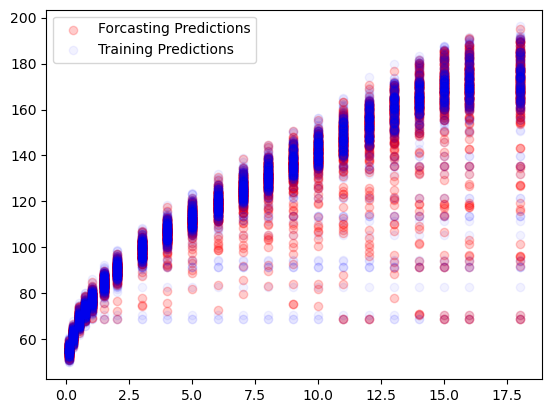

In [288]:
plt.scatter(
    x="child_age",
    y="preds",
    data=child_preds,
    color="r",
    alpha=0.2,
    label="Forcasting Predictions",
)
plt.scatter(
    x="child_age",
    y="child_height",
    data=child_preds_train,
    color="b",
    alpha=0.05,
    label="Training Predictions",
)
plt.legend()